In [1]:
import gdal 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os 
import pandas as pd
import matplotlib.colors as col
from math import sin, cos, sqrt, atan2
import glob
import datetime
import shapefile as s

In [2]:
def prism_as_array(path):
    ### enter prism file path as string por favor ###
    prism_ds = gdal.Open(path)
    prism_nodata = -9999 # get this from hdr file
    prism_band = prism_ds.GetRasterBand(1)
    prism_array = prism_band.ReadAsArray().astype(np.float32)
    # prism_nodata = prism_band.GetNoDataValue()
    prism_array[prism_array == prism_nodata] = np.nan
    prism_ds = None
    
    return prism_array

def convertlat_dd(pt):
    # for lat, coordinates are in format xxxxxxxx -> xx xx xx.xx
    # pt must be a string in order to slice 
    deg = pt[0:2]
    minn = pt[2:4]
    sec = pt[4:6]
    
    deg = int(deg)
    minn = float(minn)
    sec = int(sec)
    
    
    dd = deg + (minn/60) + (sec/3600)
    return dd

def convertlong_dd(pt):
    # for lat, coordinates are in format xxxxxxxxx -> xxx xx xx.xx
    # pt must be a string in order to slice 
    deg = int(pt[0:3])
    minn = int(pt[3:5])
    sec = int(pt[5:7])
    
    
    dd = -(deg + (minn/60) + (sec/3600))
    return dd

In [3]:
### open prism min temps for 2015 ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\min temp\\2015')
prism_min_2015_files = glob.glob('*.bil')
prism_min_2015_arrays = [prism_as_array(i) for i in prism_min_2015_files]

In [4]:
### open prism max temps for 2015 ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\max temp\\2015')
prism_max_2015_files = glob.glob('*.bil')
prism_max_2015_arrays = [prism_as_array(i) for i in prism_max_2015_files]

In [5]:
### open prism min temps for 2016 ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\min temp\\2016')
prism_min_2016_files = glob.glob('*.bil')
prism_min_2016_arrays = [prism_as_array(i) for i in prism_min_2016_files]

In [6]:
### open prism max temps for 2016 ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\max temp\\2016')
prism_max_2016_files = glob.glob('*.bil')
prism_max_2016_arrays = [prism_as_array(i) for i in prism_max_2016_files]

In [7]:
### open prism min temps for 2017 ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\min temp\\2017')
prism_min_2017_files = glob.glob('*.bil')
prism_min_2017_arrays = [prism_as_array(i) for i in prism_min_2017_files]

In [8]:
### open prism max temps for 2017 ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\max temp\\2017')
prism_max_2017_files = glob.glob('*.bil')
prism_max_2017_arrays = [prism_as_array(i) for i in prism_max_2017_files]

In [9]:
### open prism min temps for 2018 ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\min temp\\2018')
prism_min_2018_files = glob.glob('*.bil')
prism_min_2018_arrays = [prism_as_array(i) for i in prism_min_2018_files]

In [10]:
### open prism max temps for 2018 ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\max temp\\2018')
prism_max_2018_files = glob.glob('*.bil')
prism_max_2018_arrays = [prism_as_array(i) for i in prism_max_2018_files]

In [11]:
### open prism min temps for 2019 ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\min temp\\2019')
prism_min_2019_files = glob.glob('*.bil')
prism_min_2019_arrays = [prism_as_array(i) for i in prism_min_2019_files]

In [12]:
### open prism max temps for 2019 ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\max temp\\2019')
prism_max_2019_files = glob.glob('*.bil')
prism_max_2019_arrays = [prism_as_array(i) for i in prism_max_2019_files]

In [13]:
### open prism min temps for 2020 ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\min temp\\2020')
prism_min_2020_files = glob.glob('*.bil')
prism_min_2020_arrays = [prism_as_array(i) for i in prism_min_2020_files]

In [14]:
### open prism max temps for 2020 ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\max temp\\2019')
prism_max_2020_files = glob.glob('*.bil')
prism_max_2020_arrays = [prism_as_array(i) for i in prism_max_2020_files]

In [15]:
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\max temp\\2016')

# Read in PRISM header data
with open('PRISM_tmax_stable_4kmM3_201601_bil.hdr', 'r') as prism_f:
    prism_header = prism_f.readlines()[:]

prism_header

# Read the PRISM ASCII raster header
hdr_header = [item.strip().split()[0] for item in prism_header]
hdr_content = [item.strip().split()[-1] for item in prism_header]
df_hdr = pd.DataFrame(hdr_content,hdr_header)
df_hdr = df_hdr[0]

prism_nodata = float(df_hdr['NODATA'])
prism_rows = int(df_hdr['NROWS'])
prism_cols = int(df_hdr['NCOLS'])
prism_cs = float(df_hdr['XDIM'])


# set prism extent
prism_extent = [
    float(df_hdr['ULXMAP']) - 0.5 * prism_cs,
    float(df_hdr['ULXMAP']) - 0.5 * prism_cs + prism_cols * prism_cs,
    float(df_hdr['ULYMAP']) + 0.5 * prism_cs - prism_rows * prism_cs,
    float(df_hdr['ULYMAP']) + 0.5 * prism_cs
]


In [16]:
temp_dif_2015 = [prism_max_2015_arrays[i] - prism_min_2015_arrays[i] for i in range(0,len(prism_min_2015_arrays))]

temp_dif_2016 = [prism_max_2016_arrays[i] - prism_min_2016_arrays[i] for i in range(0,len(prism_min_2016_arrays))]

temp_dif_2017 = [prism_max_2017_arrays[i] - prism_min_2017_arrays[i] for i in range(0,len(prism_min_2017_arrays))]

temp_dif_2018 = [prism_max_2018_arrays[i] - prism_min_2018_arrays[i] for i in range(0,len(prism_min_2018_arrays))]

temp_dif_2019 = [prism_max_2019_arrays[i] - prism_min_2019_arrays[i] for i in range(0,len(prism_min_2019_arrays))]

temp_dif_2020 = [prism_max_2020_arrays[i] - prism_min_2020_arrays[i] for i in range(0,len(prism_min_2020_arrays))]


In [17]:
### open and read NBI databse into pd dataframe ###
os.chdir("C:\\Users\\arowan\OneDrive - New Mexico State University\\Research\\Machine Learning\\US States")

# read NBI database as pd dataframe (bridge location)
seg_filename = 'NBINM.txt'
h = pd.read_csv(seg_filename,sep=',', skipinitialspace=True, engine='python').drop([0])

# remove culverts ###
h = h[h.CULVERT_COND_062 == 'N'] 

# remove (0,0) coordinate
h = h[h.LAT_016 != 0]


X,Y = h['LAT_016'],h['LONG_017'] # go to https://www.fhwa.dot.gov/bridge/mtguide.pdf to find guide on coordinate data

# convert each lat and long to str in order to slice the integers
x_str = [str(i) for i in X]
y_str = [str(i) for i in Y]

# create dd (decimal) coordinate points for bridge locations
x = np.array([convertlat_dd(i) for i in x_str]) # x coordinate of bridge
y = np.array([convertlong_dd(i) for i in y_str])  # y coordinate of bridge

In [18]:
### convert lat and long for mean temp calculation ###
def convert_x_coord(x):
    array_shape = temp_dif_2015[0].shape
    x_new = ((x - prism_extent[0])*(array_shape[1])/(prism_extent[1] - prism_extent[0])) 

    return x_new

def convert_y_coord(y):
    array_shape = temp_dif_2015[0].shape
    y_new = ((y - prism_extent[2])*(array_shape[0])/(prism_extent[3] - prism_extent[2])) 
    y_new = array_shape[0] - y_new
    
    return y_new

xt = convert_x_coord(y)
yt = convert_y_coord(x)

In [19]:
### collect relevent data ###
data = h[['OPERATING_RATING_064','DESIGN_LOAD_031','ROUTE_NUMBER_005D','DECK_COND_058','TRAFFIC_DIRECTION_102','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060','HIGHWAY_DISTRICT_002','SURFACE_TYPE_108A','MEMBRANE_TYPE_108B','OWNER_022','FUNCTIONAL_CLASS_026','DECK_PROTECTION_108C','INSPECT_FREQ_MONTHS_091']]
data

OPERATING_RATING_064 DESIGN_LOAD_031 ROUTE_NUMBER_005D DECK_COND_058  \
1                     29.7               5             00203             5   
2                     83.7               4             00000             5   
3                     56.7               4             00000             6   
4                     42.3               6             00000             6   
5                     85.5               6             00000             6   
...                    ...             ...               ...           ...   
3977                  36.3               0             00000             7   
3979                  78.7               5             00000             7   
3980                  15.2               0             00433             5   
3981                  30.6               5             00000             7   
4013                   NaN               9             00000             7   

      TRAFFIC_DIRECTION_102 SUPERSTRUCTURE_COND_059 SUBSTRUCTURE_COND_060  \
1                         3                       5                     5   
2                         3                       4                     5   
3                         2                       7                     6   
4                         2                       7                     7   
5                         2                       6                     7   
...                     ...                     ...                   ...   
3977                      2                       7                     6   
3979                      2                       7                     7   
3980                      2                       5                     5   
3981                      2                       7                     3   
4013                      2                       7                     7   

      HIGHWAY_DISTRICT_002 SURFACE_TYPE_108A MEMBRANE_TYPE_108B  OWNER_022  \
1                        0                 8                  0         69   
2                        0                 0                  0         69   
3                        0                 0                  0         69   
4                        0                 0                  0         69   
5                        0                 8                  8         69   
...                    ...               ...                ...        ...   
3977                     1                 1                  0         72   
3979                     3                 0                  0         70   
3980                     4                 0                  0         70   
3981                     3                 0                  0         70   
4013                     1                 1                  0         74   

      FUNCTIONAL_CLASS_026 DECK_PROTECTION_108C  INSPECT_FREQ_MONTHS_091  
1                      6.0                    8                       24  
2                      6.0                    0                       24  
3                      6.0                    0                       24  
4                      6.0                    0                       24  
5                      6.0                    8                       24  
...                    ...                  ...                      ...  
3977                   9.0                    0                       24  
3979                   9.0                    1                       24  
3980                   9.0                    0                       12  
3981                   9.0                    8                       24  
4013                   6.0                    0                       24  

[2199 rows x 14 columns]

In [20]:
# calculate mean temp for each month at each bridge location, yr 2016
def calc_mean_temp(prism_array,lat,lon,r):
    # bridge location
    cen_x = lat
    cen_y = lon

    # Image parameters
    a = prism_array.shape[0]
    b = prism_array.shape[1]

    # Find radial distances
    [X, Y] = np.meshgrid(np.arange(b) - cen_x, np.arange(a) - cen_y)
    R = np.sqrt(np.square(X) + np.square(Y))
    
    rad = np.arange(1, np.max(R), 1)
    intensity = np.zeros(len(rad))   
    bin_size = 0
    
    r = rad[r]
    mask = (np.less(R, r + bin_size))
    mean = np.mean(prism_array[mask])
    
    return mean,mask

In [27]:
%%time
### 2015 data ###
cols = ['Jan 2015','Feb 2015','Mar 2015','April 2015','May 2015', 'June 2015', 'Jul 2015', 'Aug 2015', 'Sep 2015','Oct 2015', 'Nov 2015', 'Dec 2015']


df_2015 = []

for i in range(0,xt.shape[0]):    # loop over every bridge
    values = [calc_mean_temp(temp_dif_2015[j],xt[i],yt[i],1)[0] for j in range(0,12)]                              # loop over every month 
    zipped = zip(cols,values)   
    a_dict = dict(zipped)
    df_2015.append(a_dict)
    
df_2015 = pd.DataFrame(df_2015)

Wall time: 6min 53s


In [28]:
%%time
### 2016 data ###
cols = ['Jan 2016','Feb 2016','Mar 2016','April 2016','May 2016', 'June 2016', 'Jul 2016', 'Aug 2016', 'Sep 2016','Oct 2016', 'Nov 2016', 'Dec 2016']


df_2016 = []

for i in range(0,xt.shape[0]):    # loop over every bridge
    values = [calc_mean_temp(temp_dif_2016[j],xt[i],yt[i],1)[0] for j in range(0,12)]                              # loop over every month 
    zipped = zip(cols,values)   
    a_dict = dict(zipped)
    df_2016.append(a_dict)
    
df_2016 = pd.DataFrame(df_2016)

Wall time: 6min 47s


In [29]:
%%time
### 2017 data ###
cols = ['Jan 2017','Feb 2017','Mar 2017','April 2017','May 2017', 'June 2017', 'Jul 2017', 'Aug 2017', 'Sep 2017','Oct 2017', 'Nov 2017', 'Dec 2017']


df_2017 = []

for i in range(0,xt.shape[0]):    # loop over every bridge
    values = [calc_mean_temp(temp_dif_2017[j],xt[i],yt[i],1)[0] for j in range(0,12)]                              # loop over every month 
    zipped = zip(cols,values)   
    a_dict = dict(zipped)
    df_2017.append(a_dict)
    
df_2017 = pd.DataFrame(df_2017)    

Wall time: 6min 47s


In [30]:
%%time
### 2018 data ###
cols = ['Jan 2018','Feb 2018','Mar 2018','April 2018','May 2018', 'June 2018', 'Jul 2018', 'Aug 2018', 'Sep 2018','Oct 2018', 'Nov 2018', 'Dec 2018']


df_2018 = []

for i in range(0,xt.shape[0]):    # loop over every bridge
    values = [calc_mean_temp(temp_dif_2018[j],xt[i],yt[i],1)[0] for j in range(0,12)]                              # loop over every month 
    zipped = zip(cols,values)   
    a_dict = dict(zipped)
    df_2018.append(a_dict)
    
df_2018 = pd.DataFrame(df_2018)

Wall time: 6min 53s


In [31]:
%%time
### 2019 data ###
cols = ['Jan 2019','Feb 2019','Mar 2019','April 2019','May 2019', 'June 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019','Oct 2019', 'Nov 2019', 'Dec 2019']


df_2019 = []

for i in range(0,xt.shape[0]):    # loop over every bridge
    values = [calc_mean_temp(temp_dif_2019[j],xt[i],yt[i],1)[0] for j in range(0,12)]                              # loop over every month 
    zipped = zip(cols,values)   
    a_dict = dict(zipped)
    df_2019.append(a_dict)
    
df_2019 = pd.DataFrame(df_2019)

Wall time: 6min 49s


In [59]:
%%time
### 2020 data ###
cols = ['Jan 2020','Feb 2020','Mar 2020','April 2020','May 2020', 'June 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020','Oct 2020', 'Nov 2020', 'Dec 2020']


df_2020 = []

for i in range(0,xt.shape[0]):    # loop over every bridge
    values = [calc_mean_temp(temp_dif_2020[j],xt[i],yt[i],1)[0] for j in range(0,8)]                              # loop over every month 
    zipped = zip(cols,values)   
    a_dict = dict(zipped)
    df_2020.append(a_dict)
    
df_2020 = pd.DataFrame(df_2020)

Wall time: 4min 36s


In [33]:
df_2015 = df_2015.reset_index(drop=True)
df_2016 = df_2016.reset_index(drop=True)

In [34]:
w_data = [df_2015,df_2016,df_2017,df_2018,df_2019,df_2020]
w_data = pd.concat(w_data,axis = 1)

In [35]:
# os.chdir('C:\\Users\\arowan\OneDrive - New Mexico State University\\Research\Machine Learning\\prism weather data')

In [36]:
# w_data.to_csv('weather_data(2015-2020).csv')

In [37]:
np_data = w_data.to_numpy()

In [38]:
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

In [39]:
os.getcwd()

'C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\US States'

In [40]:
np_data.shape

(2199, 68)

2199


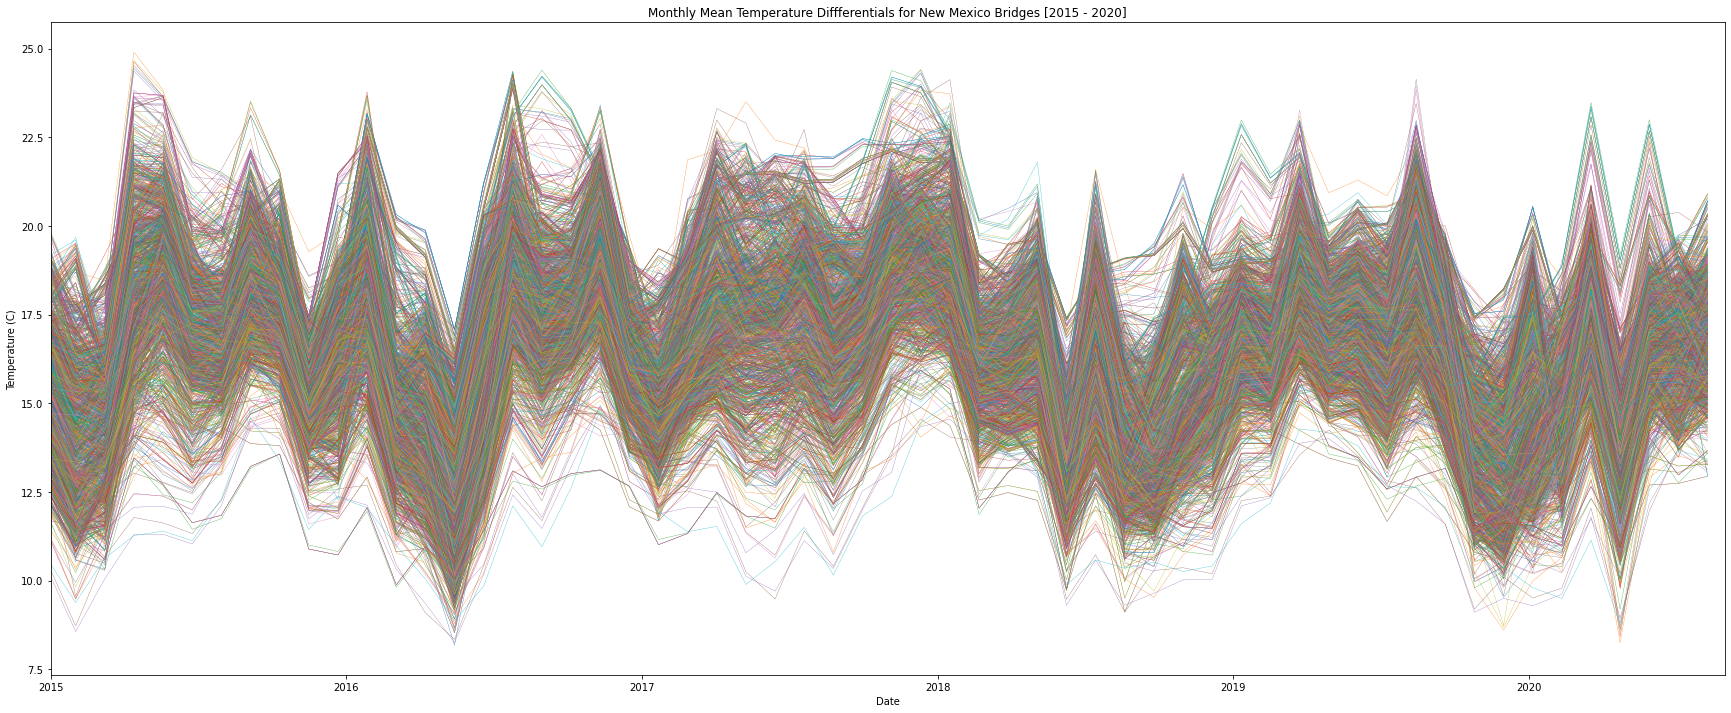

In [41]:
date1 = datetime.date(2014, 1, 1)
date2 = datetime.date(2020, 8, 30)
delta = datetime.timedelta(days=36)

dates = drange(date1, date2, delta)
fig = plt.figure(figsize=(30,12))
axes = plt.axes()

cnt = 0
for i in range(0,np_data.shape[0]):
    cnt += 1
    plt.plot(dates,np_data[i,:],lw=.3)
    axes.set_xlim([datetime.date(2015, 1, 1), datetime.date(2020, 8, 30)])
    
print(cnt)
plt.title('Monthly Mean Temperature Diffferentials for New Mexico Bridges [2015 - 2020]')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()
fig.savefig('temp_plot.svg')

In [42]:
def make_segmented_cmap(): 
    c1 = '#f5f4f2'
    c2 = '#b0b0b0'
    c3 = '#9c086f'
    c4 = '#de079c'
    c5 = '#b8d2de'
    c6 = '#6f9aad'
    c7 = '#02f5ed'
    c8 = '#66f5ff'
    c9 = '#adc3ff'
    c10 = '#a3a3f0'
    c11 = '#7e7ecf'
    c12 = '#4d4dc9'
    c13 = '#0000fc'
    c14 = '#6074b5'
    c15 = '#4a7052'
    c16 = '#2b8f3a'
    c17 = '#57b565'
    c18 = '#8ce070'
    c19 = '#c0f7ab'
    c20 = '#fbff00'
    c21 = '#ffbb00'
    c22 = '#edb92b'
    c23 = '#ad7924'
    c24 = '#e07575'
    c25 = '#ff0000'
    c26 = '#ad0000'
    c27 = '#7d0000'
    anglemap = col.LinearSegmentedColormap.from_list('anglemap', [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27], N=256, gamma=1)
    return anglemap

segmented_cmap = make_segmented_cmap()


In [43]:
os.chdir("C:\\Users\\arowan\OneDrive - New Mexico State University\\Research\\Machine Learning\\US States")
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' column holding
    the geometry information. This uses the pyshp package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

shp_path = 'tl_2019_us_state.shp'
shape = s.Reader("tl_2019_us_state.shp")
df = read_shapefile(shape)
nm = df.loc[12,:,]

<ipython-input-44-9cab408055c3>:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


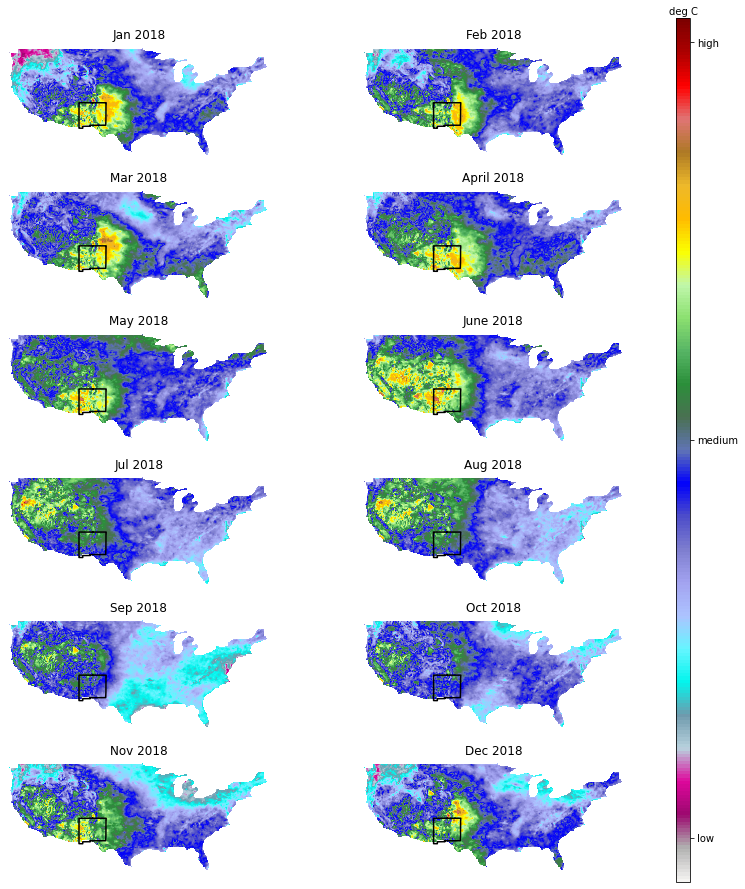

In [44]:
cols = ['Jan 2018','Feb 2018','Mar 2018','April 2018','May 2018', 'June 2018', 'Jul 2018', 'Aug 2018', 'Sep 2018','Oct 2018', 'Nov 2018', 'Dec 2018']


fig = plt.figure(figsize=(10,24))

for i in range(1,len(temp_dif_2018)):
    fig.add_subplot(12,2,i)
     # add nm state outline
    pts = nm['coords']
    xs = [x[0] for x in pts]
    ys = [x[1] for x in pts]
    plt.plot(xs, ys,'black')
    # add PRISM data
    im = plt.imshow(temp_dif_2018[i-1],cmap=segmented_cmap,extent=prism_extent)
    plt.axis('off')  
    plt.title(cols[i-1])
    

cb_ax = fig.add_axes([1, .5, .02, .5])
cbar = fig.colorbar(im,cax=cb_ax)
cbar.set_ticks(np.arange(3, 25, 9))
cbar.set_ticklabels(['low', 'medium', 'high'])
cbar.set_label('deg C', labelpad=-55, y=1.013, rotation=0)
fig.tight_layout()
plt.show()
fig.savefig('temp_dif[2015-202].svg')

In [45]:
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\Screenshots\\Monthly images (2018)')

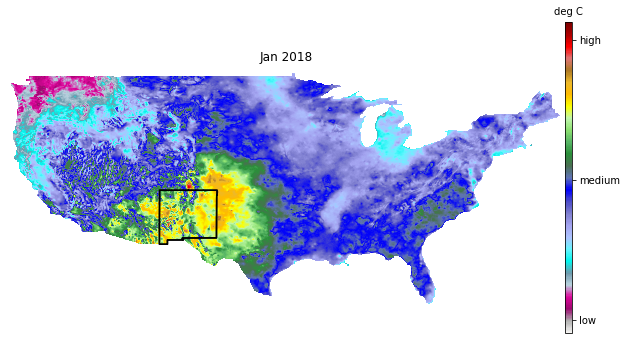

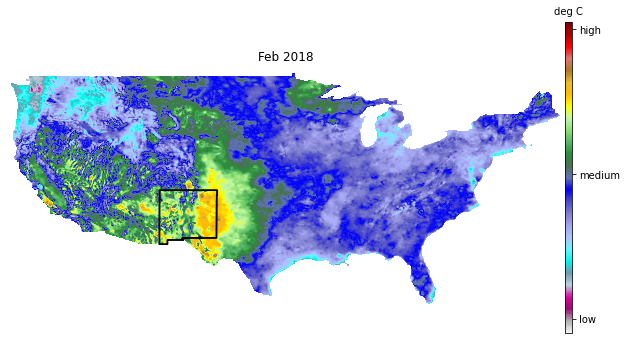

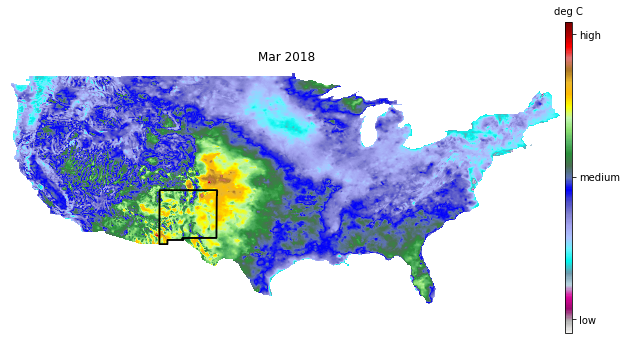

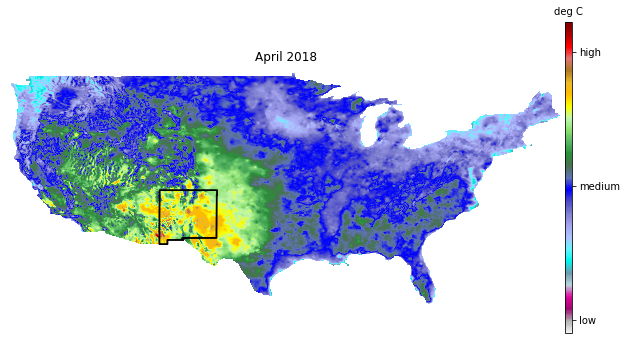

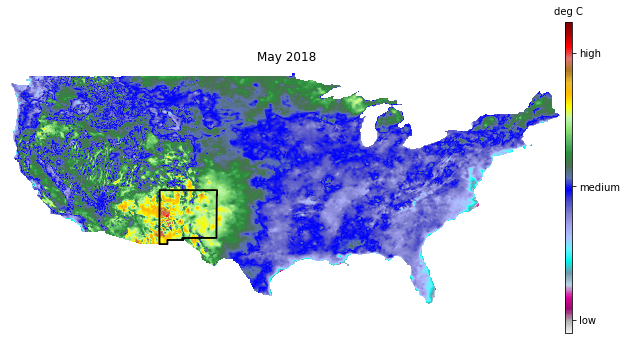

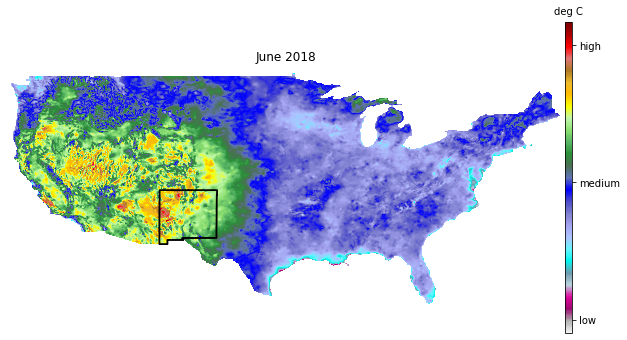

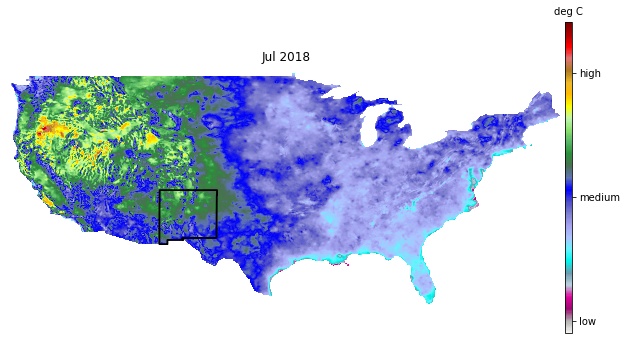

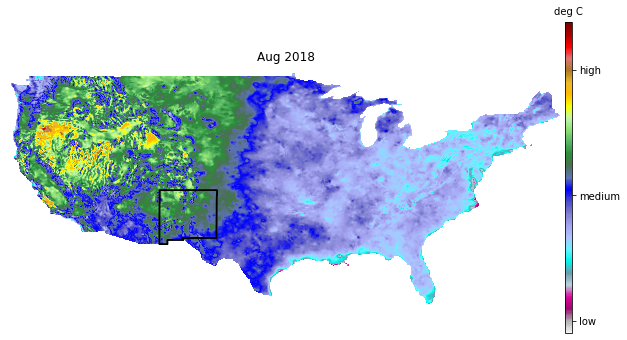

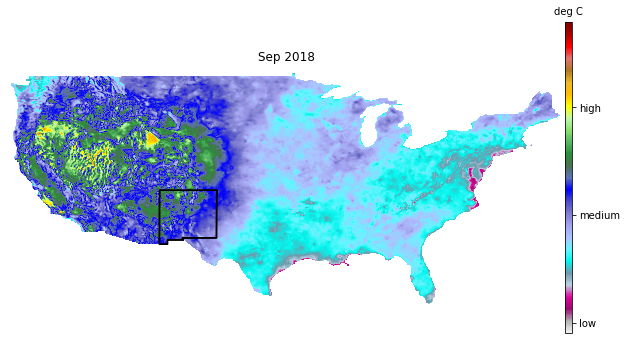

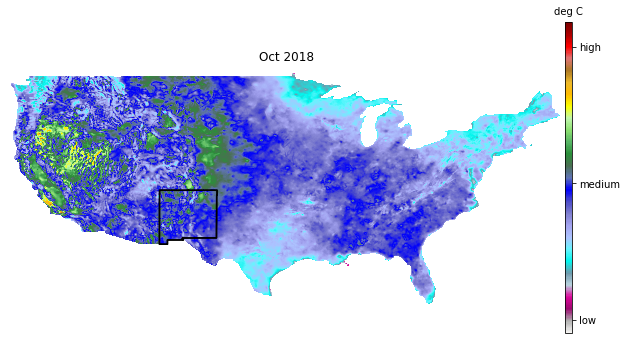

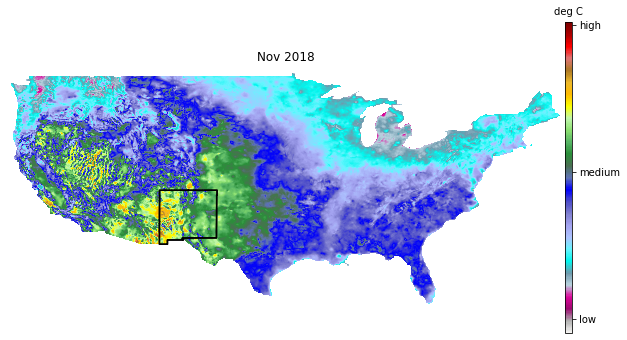

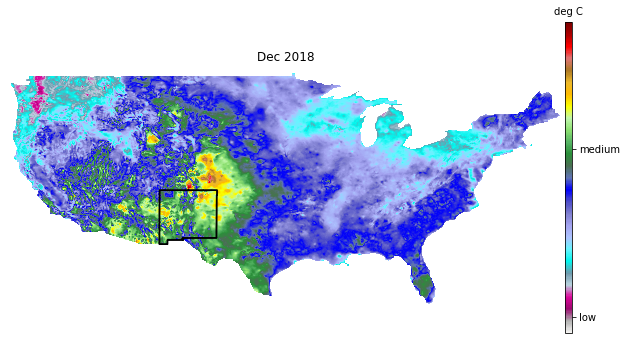

In [46]:
cols = ['Jan 2018','Feb 2018','Mar 2018','April 2018','May 2018', 'June 2018', 'Jul 2018', 'Aug 2018', 'Sep 2018','Oct 2018', 'Nov 2018', 'Dec 2018']

for i in range(0,12):
    fig = plt.figure(figsize=(10,24))
    pts = nm['coords']
    xs = [x[0] for x in pts]
    ys = [x[1] for x in pts]
    plt.plot(xs, ys,'black')
    
    
    
    plt.plot(xs, ys,'black')
    # add PRISM data
    im = plt.imshow(temp_dif_2018[i],cmap=segmented_cmap,extent=prism_extent)
    plt.axis('off')  
    plt.title(cols[i])
    
    cb_ax = fig.add_axes([.9, .42, .01, .18])
    cbar = fig.colorbar(im,cax=cb_ax)
    cbar.set_ticks(np.arange(3, 50, 10.55))
    cbar.set_ticklabels(['low', 'medium', 'high'])
    cbar.set_label('deg C', labelpad=-52, y=1.048, rotation=0)

    fig.savefig(cols[i]+'.svg')    

In [47]:
### getting daily values for january, 2015 located around toas gorge bridge ###

### open prism min temps for 2015 ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\Machine Learning\\prism weather data\\Jan 2018 Data\\Min Temp')
prism_min_Jan_files = glob.glob('*.bil')
prism_min_Jan = [prism_as_array(i) for i in prism_min_Jan_files]

In [48]:
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\Machine Learning\\prism weather data\\Jan 2018 Data\\Max Temp')
prism_max_Jan_files = glob.glob('*.bil')
prism_max_Jan = [prism_as_array(i) for i in prism_max_Jan_files]

In [49]:
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\Machine Learning\\prism weather data\\Jan 2018 Data\\Mean Temp')
prism_mean_Jan_files = glob.glob('*.bil')
prism_mean_Jan = [prism_as_array(i) for i in prism_mean_Jan_files]

In [50]:
x_toas = convert_y_coord(36.476111)
y_toas = convert_x_coord(-105.732222)

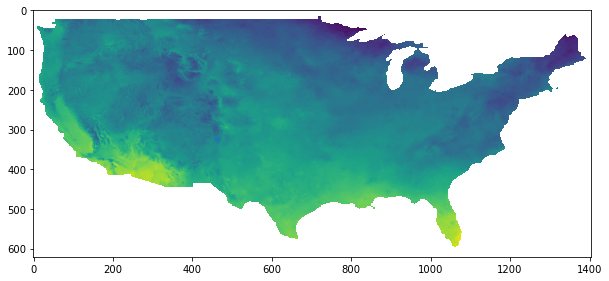

In [51]:
fig = plt.figure(figsize=(10,24))
plt.imshow(prism_mean_Jan[8])
plt.scatter(y_toas,x_toas,s=20)
plt.show()

In [52]:
mean_values = [calc_mean_temp(prism_mean_Jan[j],y_toas,x_toas,1)[0] for j in range(0,len(prism_mean_Jan))]
min_values = [calc_mean_temp(prism_min_Jan[j],y_toas,x_toas,1)[0] for j in range(0,len(prism_min_Jan))]
max_values = [calc_mean_temp(prism_max_Jan[j],y_toas,x_toas,1)[0] for j in range(0,len(prism_max_Jan))]

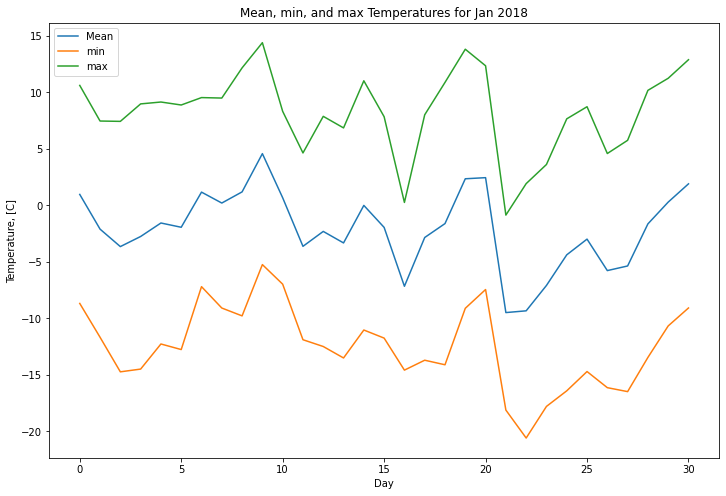

In [53]:
plt.figure(figsize=(12,8))
plt.plot(mean_values,label='Mean')
plt.plot(min_values,label='min')
plt.plot(max_values,label='max')
plt.legend()
plt.title('Mean, min, and max Temperatures for Jan 2018')
plt.xlabel('Day')
plt.ylabel('Temperature, [C]')
plt.show()

In [54]:
### getting daily values for year of 2019 ###

### open prism min temps ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\Daily 2019\\min')
files_min_2019 = glob.glob('*.bil')
prism_min_2019 = [prism_as_array(i) for i in files_min_2019]

### open prism max temps ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\Daily 2019\\max')
files_max_2019 = glob.glob('*.bil')
prism_max_2019 = [prism_as_array(i) for i in files_max_2019]

### open prism mean temps ###
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\prism weather data\\Daily 2019\\mean')
file_mean_2019 = glob.glob('*.bil')
prism_mean_2019 = [prism_as_array(i) for i in file_mean_2019]

In [112]:
%%time
### min daily values for bridges in 2019 ###

daily_2019 = np.zeros((xt.shape[0],365))

for i in range(0,xt.shape[0]):    # loop over every bridge
    values = [calc_mean_temp(prism_min_2019[j],xt[i],yt[i],1)[0] for j in range(0,len(files_min_2019))] # loop over every month 
    daily_2019[i,:] = values
    


Wall time: 3h 25min 52s


In [142]:
os.chdir('C:\\Users\\arowan\\OneDrive - New Mexico State University\\Research\\Machine Learning\\Screenshots')

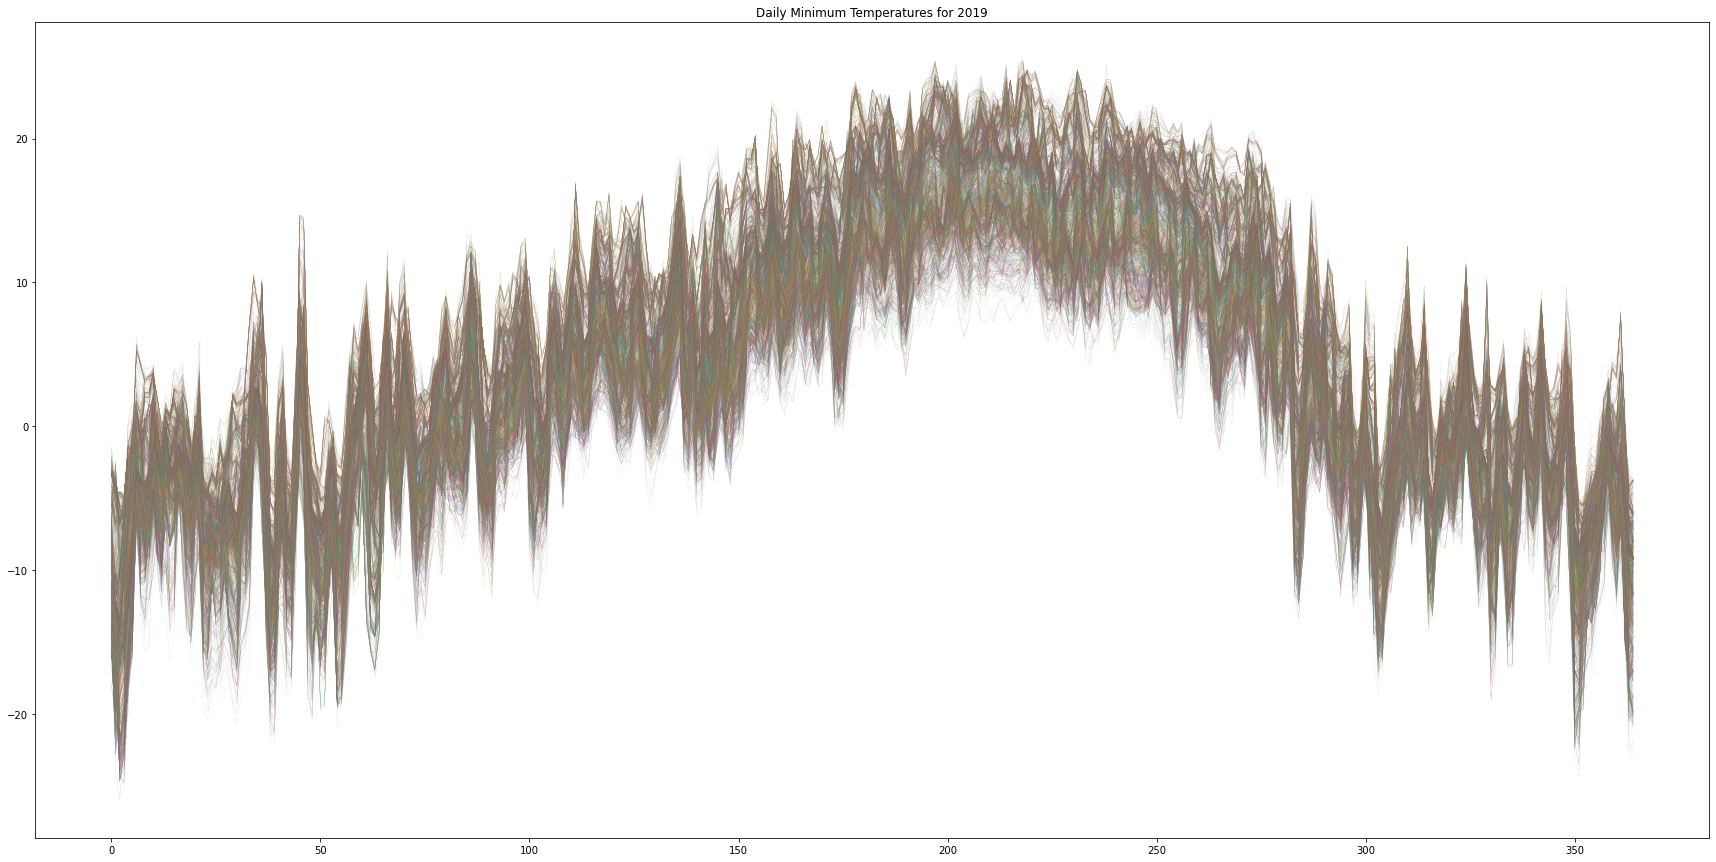

In [153]:
fig = plt.figure(figsize=(30,15))

for i in range(daily_2019.shape[0]):
    plt.plot(daily_2019[i],lw=.06)

fig.xlim=([0,365])    
plt.title('Daily Minimum Temperatures for 2019')   

fig.savefig('daily_min_2019.svg') 

plt.show()


In [135]:
%%time
### max daily values for bridges in 2019 ###

daily_2019_max = np.zeros((xt.shape[0],365))

for i in range(0,xt.shape[0]):    # loop over every bridge
    values = [calc_mean_temp(prism_max_2019[j],xt[i],yt[i],1)[0] for j in range(0,len(files_max_2019))] # loop over every month 
    daily_2019_max[i,:] = values

Wall time: 3h 25min 32s


In [139]:
%%time
### mean daily values for bridges in 2019 ###

daily_2019_mean = np.zeros((xt.shape[0],365))

for i in range(0,xt.shape[0]):    # loop over every bridge
    values = [calc_mean_temp(prism_mean_2019[j],xt[i],yt[i],1)[0] for j in range(0,len(file_mean_2019))] # loop over every month 
    daily_2019_mean[i,:] = values

Wall time: 3h 26min 38s


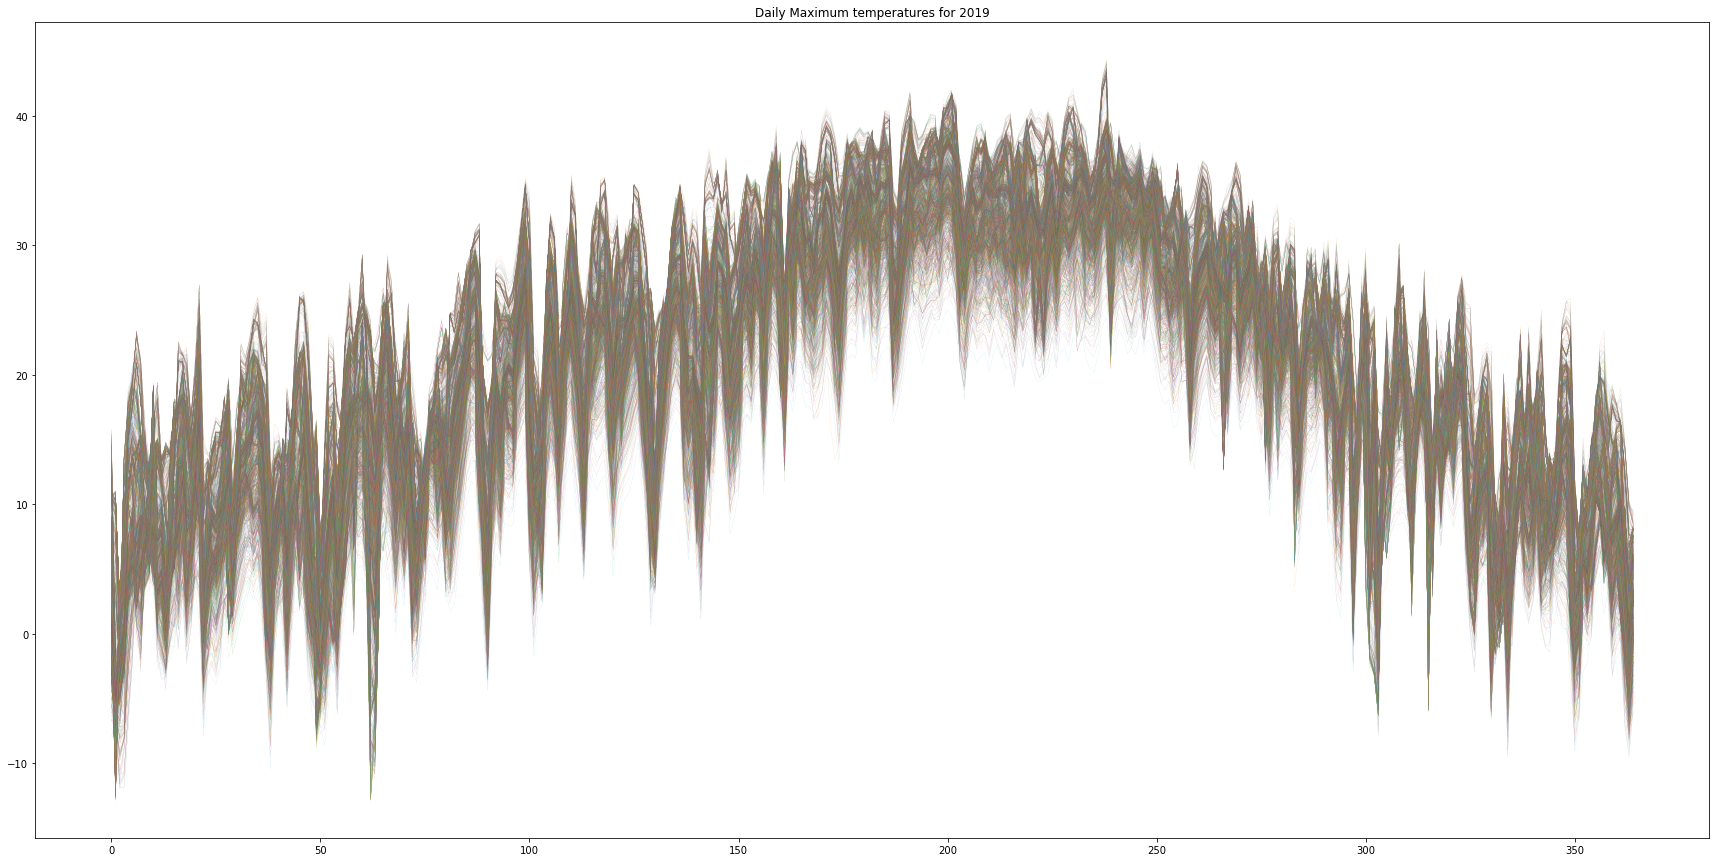

In [151]:
fig = plt.figure(figsize=(30,15))

for i in range(daily_2019_max.shape[0]):
    plt.plot(daily_2019_max[i],lw=.06)

plt.title('Daily Maximum temperatures for 2019')
fig.xlim=([0,365])

fig.savefig('daily_max_2019.svg')
plt.show()

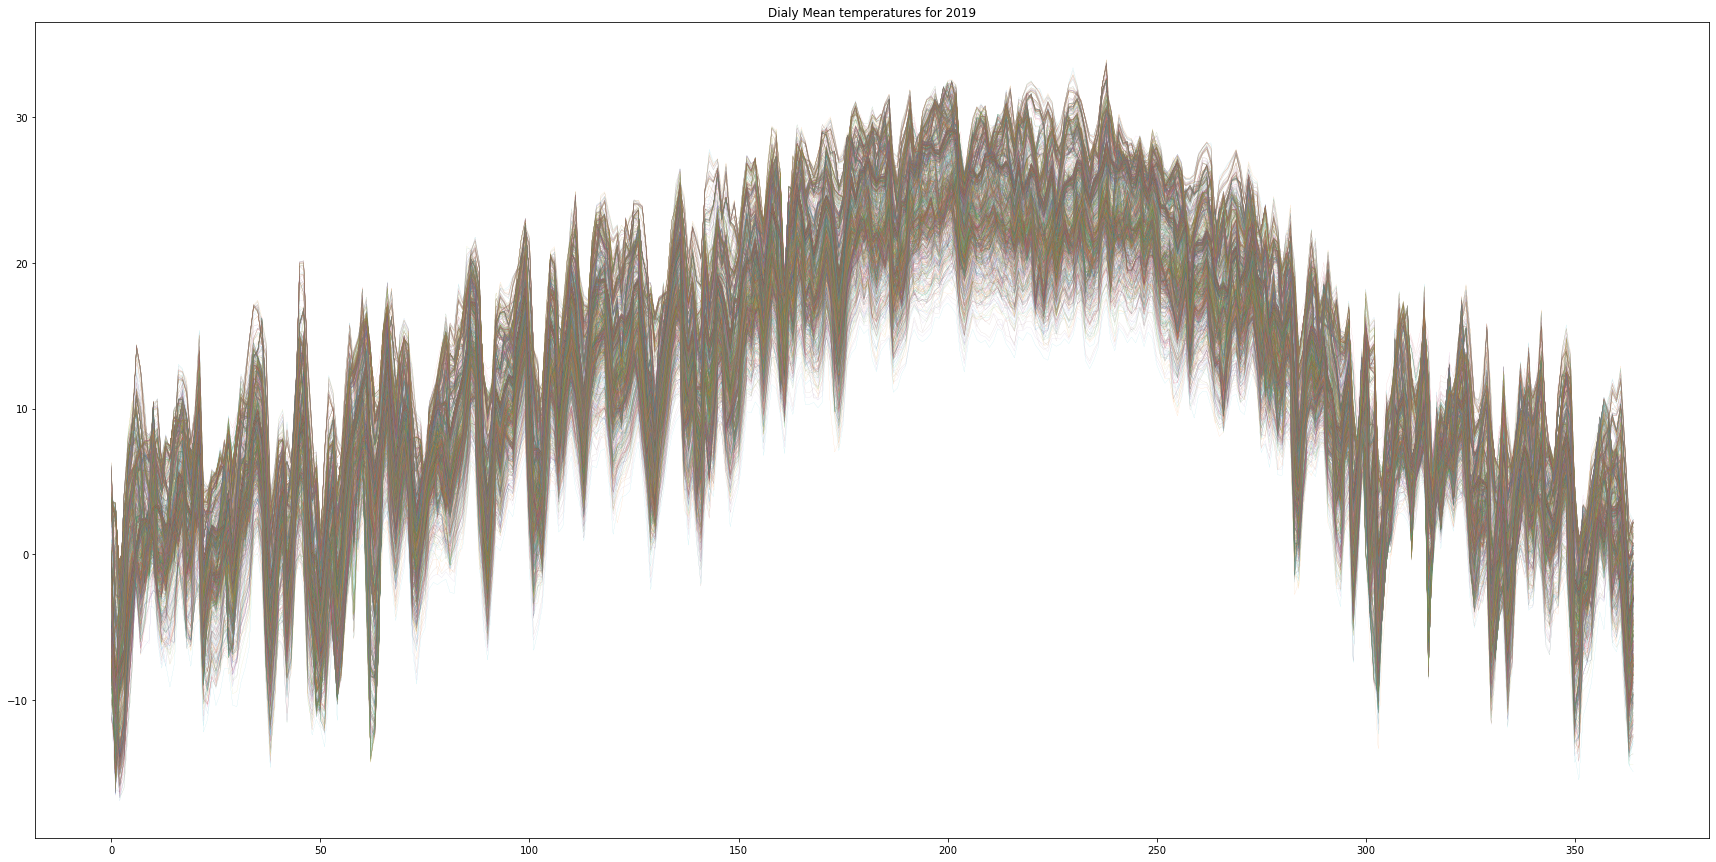

In [152]:
fig = plt.figure(figsize=(30,15))

for i in range(daily_2019_mean.shape[0]):
    plt.plot(daily_2019_mean[i],lw=.06)

plt.title('Dialy Mean temperatures for 2019')
fig.xlim=([0,365])

plt.savefig('dialy_mean_2019.svg')
plt.show()